# The Dow Jones Industrial Average and Its 30 Components

## Downloading Dow Jones Component Data with yfinance


In [3]:
import numpy as np
print(np.__version__)

2.0.2


In [41]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import pandas as pd

# --- 1. Download the Data ---
# FIX: Replaced the delisted 'UTX' with the new 'RTX' ticker
SYMBOLS = [
    'AAPL','MMM', 'AXP', 'BA', 'CAT',
    'CVX', 'CSCO', 'KO', 'DD', 'XOM',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ',
    'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'UNH', 'RTX', 'TRV',
    'VZ', 'V', 'WMT', 'WBA', 'DIS',
]

print("Downloading Dow Jones component data...")
df_components = yf.download(
    SYMBOLS,
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)['Close']
print("Data downloaded successfully.")


# --- 2. Prepare and Resample the Data ---
# FIX: This code is now in the same cell to prevent NameErrors.
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('D').ffill() # Use 'D' for daily
daily_df_components = daily_df_components.fillna(method='bfill')

# Display a sample to confirm it worked
daily_df_components.head()

Data downloaded successfully.


Ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,26.827242,66.700768,145.533691,76.827263,23.355852,82.049690,68.654068,99.918640,201.997559,109.414604,...,21.483494,66.519096,56.959625,100.143501,141.769440,74.963760,34.433498,58.553719,19.715082,61.824554
2017-01-04,26.797216,67.794243,147.063461,76.483940,23.217007,82.028793,69.202354,101.199646,203.301987,110.384041,...,21.672287,66.756111,56.995594,99.605110,142.173340,75.576660,34.395653,58.567833,19.829939,61.144360
2017-01-05,26.933498,66.958588,147.146896,76.018044,23.271008,81.673729,68.892456,101.143143,201.788498,109.080597,...,21.880613,67.198517,57.226856,98.014748,142.410461,76.463043,34.471355,58.603123,19.873011,60.232849
2017-01-06,27.233749,67.091957,147.508514,76.050735,23.317280,81.346489,68.463409,102.650208,204.782059,108.779182,...,21.795984,67.174820,57.843586,97.965034,142.612396,77.519142,33.959991,58.652519,19.600225,60.198845
2017-01-07,27.233749,67.091957,147.508514,76.050735,23.317280,81.346489,68.463409,102.650208,204.782059,108.779182,...,21.795984,67.174820,57.843586,97.965034,142.612396,77.519142,33.959991,58.652519,19.600225,60.198845


## Downloading NDAQ Dataset from Alpha Vantage

In [6]:
import yfinance as yf
import pandas as pd

# --- 1. Download the Data for the Correct Period ---
# FIX: Specify the start and end dates to ensure we have data for 2017.
print("Downloading NDAQ data...")
df = yf.download(
    'NDAQ',
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)

# --- 2. Check if the Download was Successful ---
if df.empty:
    raise ValueError("Data download failed. Please check the ticker or your connection.")

print("Data downloaded successfully.")

# --- 3. Prepare and Resample the DataFrame ---
# FIX: Use the 'Close' column, which is the correct name from yfinance.
df_dji = pd.DataFrame(df['Close'])
df_dji.columns = ['NDAQ']

# The following line will now work because df_dji contains 2017 data.
djia_2017 = pd.DataFrame(df_dji.loc['2017'])

# FIX: Use 'D' for daily resampling, which is the standard pandas frequency string.
djia_2017 = djia_2017.resample('D').ffill()

# Display a sample to confirm it worked
djia_2017.head()

Data downloaded successfully.


,NDAQ
Date,
2017-01-03,19.382509
2017-01-04,19.684816
2017-01-05,19.661562
2017-01-06,19.899918
2017-01-07,19.899918


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NDAQ)   251 non-null    float64
 1   (High, NDAQ)    251 non-null    float64
 2   (Low, NDAQ)     251 non-null    float64
 3   (Open, NDAQ)    251 non-null    float64
 4   (Volume, NDAQ)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [8]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [9]:
from sklearn.decomposition import KernelPCA

fn_z_score = lambda x: (x - x.mean()) / x.std()

# FIX: Use the correct DataFrame name 'df_components'
df_z_components = df_components.apply(fn_z_score)

# This line will now work
fitted_pca = KernelPCA().fit(df_z_components)

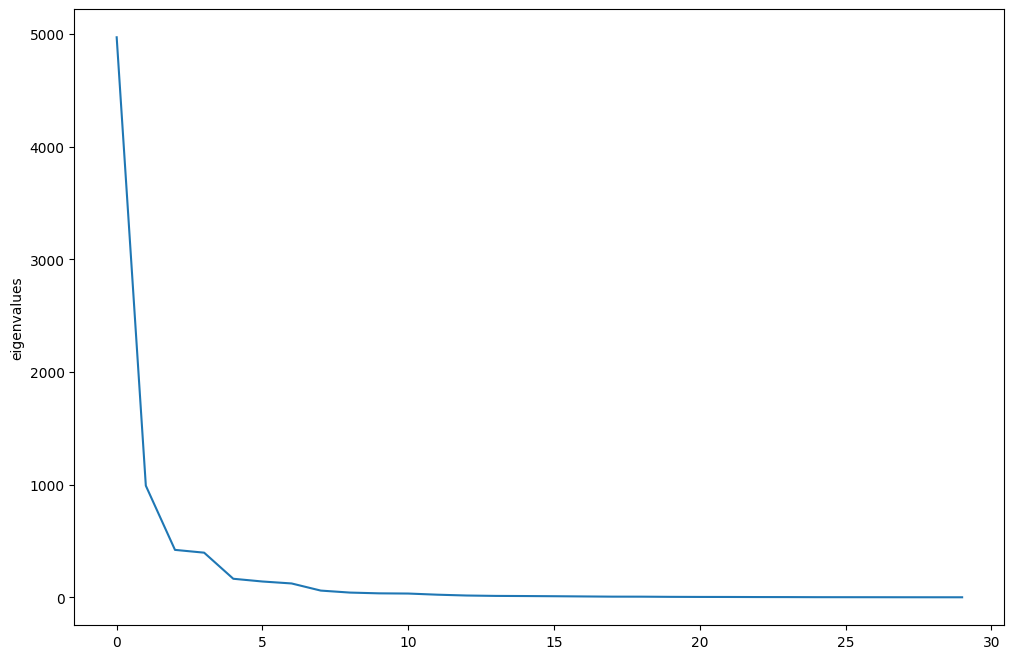

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

# FIX: Use the correct attribute 'eigenvalues_' instead of the old 'lambdas_'
plt.plot(fitted_pca.eigenvalues_)

plt.ylabel('eigenvalues')
plt.show();

In [11]:
fn_weighted_avg = lambda x: x / x.sum()

# FIX: Use the correct attribute 'eigenvalues_' instead of the old 'lambdas_'
weighted_values = fn_weighted_avg(fitted_pca.eigenvalues_)[:5]

In [12]:
print(weighted_values)

[0.66285664 0.13216082 0.05618839 0.0528838  0.02200384]


In [13]:
weighted_values.sum()

np.float64(0.9260934850965494)

## Reconstructing the Dow Index with PCA

DJIA data downloaded.


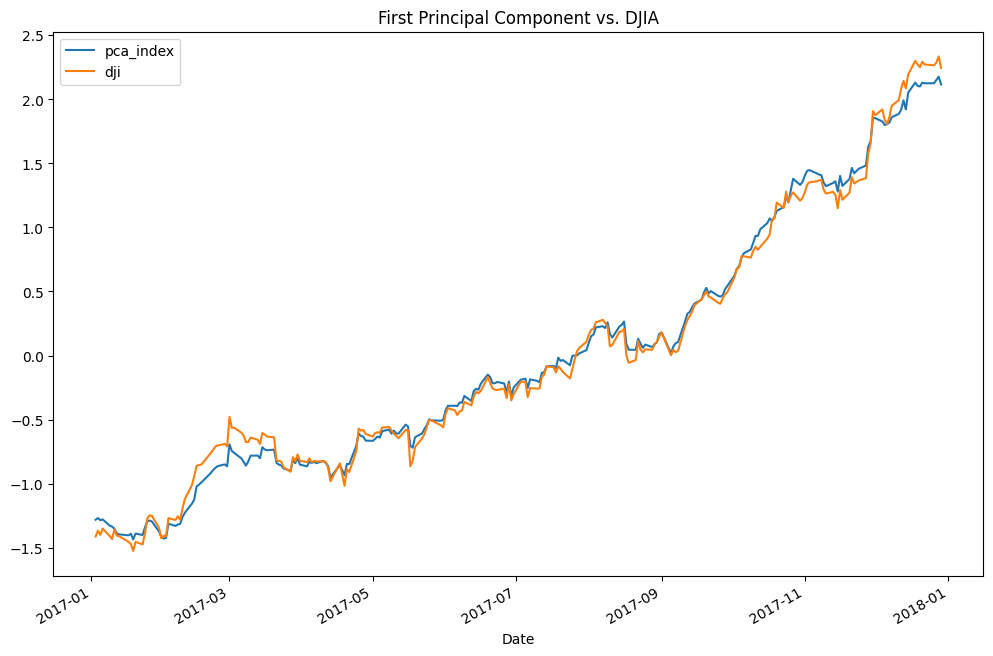

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import KernelPCA

# --- 1. Perform PCA and Extract the First Component ---
kernel_pca = KernelPCA(n_components=5).fit(df_z_components)
pca_5 = kernel_pca.transform(df_z_components)

# Use the first principal component as the index.
pca_index = pca_5[:, 0]

# --- 2. Download the actual DJIA for comparison ---
print("Downloading DJIA data...")
djia_df = yf.download(
    '^DJI',
    start='2017-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)['Close']
print("DJIA data downloaded.")

# --- 3. Combine and plot the results ---
# Explicitly align the DJIA data to the components' index.
aligned_djia = djia_df.reindex(df_z_components.index, method='ffill')

# FIX: Force both arrays to be 1-dimensional using .flatten()
df_combined = pd.DataFrame({
    'pca_index': pca_index.flatten(),
    'dji': aligned_djia.to_numpy().flatten()
}, index=df_z_components.index)

# Apply z-score normalization for a fair comparison.
fn_z_score = lambda x: (x - x.mean()) / x.std()
df_combined = df_combined.apply(fn_z_score).dropna()

# Plot the results.
df_combined.plot(figsize=(12, 8), title="First Principal Component vs. DJIA");

# Analyzing a time series with trend

In [15]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf

# FIX: Download the data for Gold futures ('GC=F') using yfinance
df = yf.download(
    'GC=F',
    start='2000-01-01',
    interval='1mo', # Use '1mo' for monthly data
    auto_adjust=True,
    progress=False
)

# Select and rename the 'Close' column to match the original notebook's intent
df = df[['Close']].rename(columns={'Close': 'Settle'})

# Display the first few rows to confirm it worked
df.head()

Price,Settle
Ticker,GC=F
Date,
2000-08-01,278.299988
2000-09-01,273.600006
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [16]:
df.head()

Price,Settle
Ticker,GC=F
Date,
2000-08-01,278.299988
2000-09-01,273.600006
2000-11-01,270.100006
2000-12-01,272.000000
2001-01-01,265.600006


In [17]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

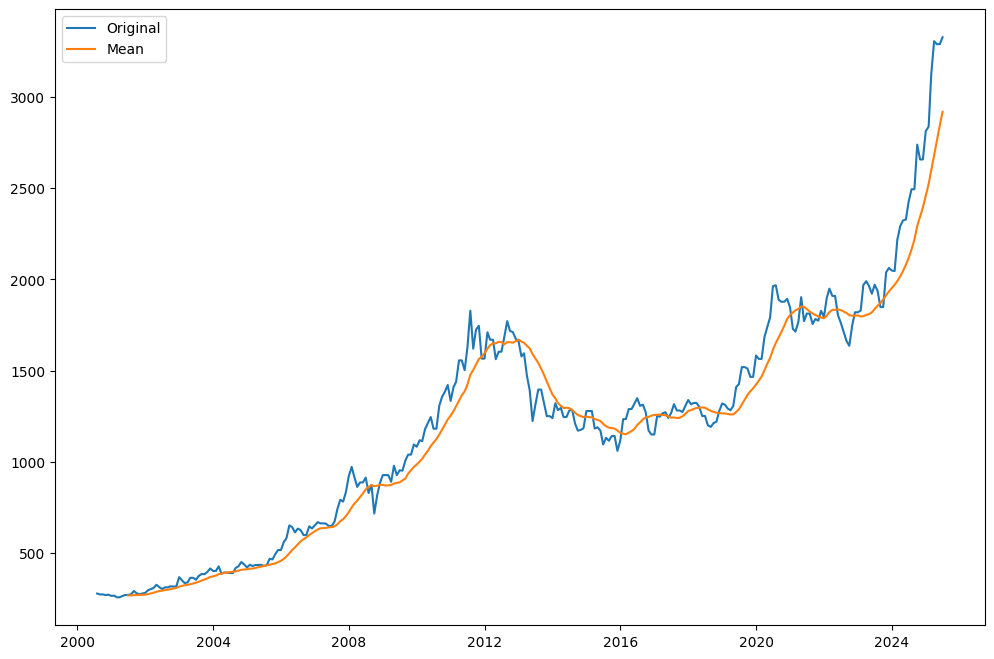

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

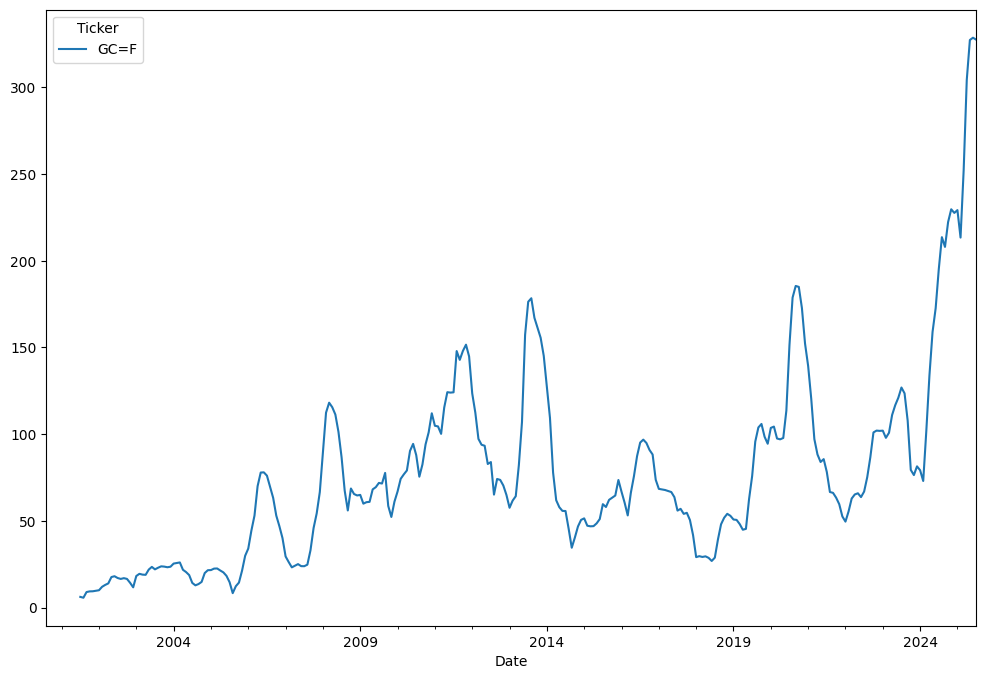

In [19]:
df_std.plot(figsize=(12, 8));

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  1.9319242708071611
p-value: 0.9985776851643725
Critical value (1%): -3.452
Critical value (5%): -2.871
Critical value (10%): -2.572


# Making a time series stationary

## Detrending

In [21]:
import numpy as np

df_log = np.log(df_settle)

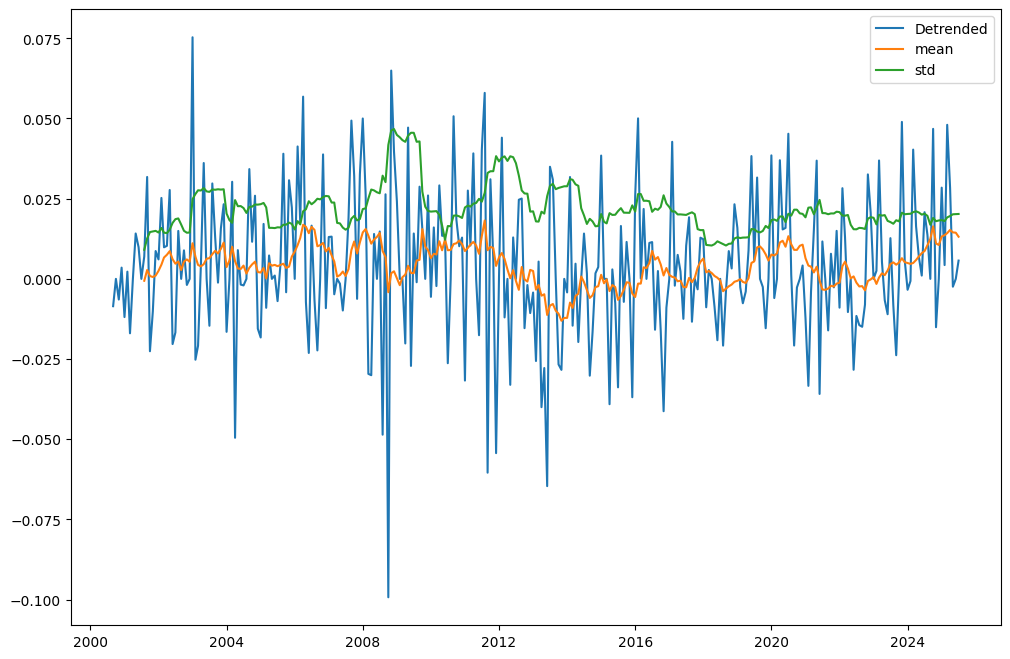

In [22]:
df_log_ma= df_log.rolling(2).mean()
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -18.1703722191081
p-value: 0.00000
Critical value (1%): -3.452
Critical value (5%): -2.871
Critical value (10%): -2.572


## Removing trend by differencing

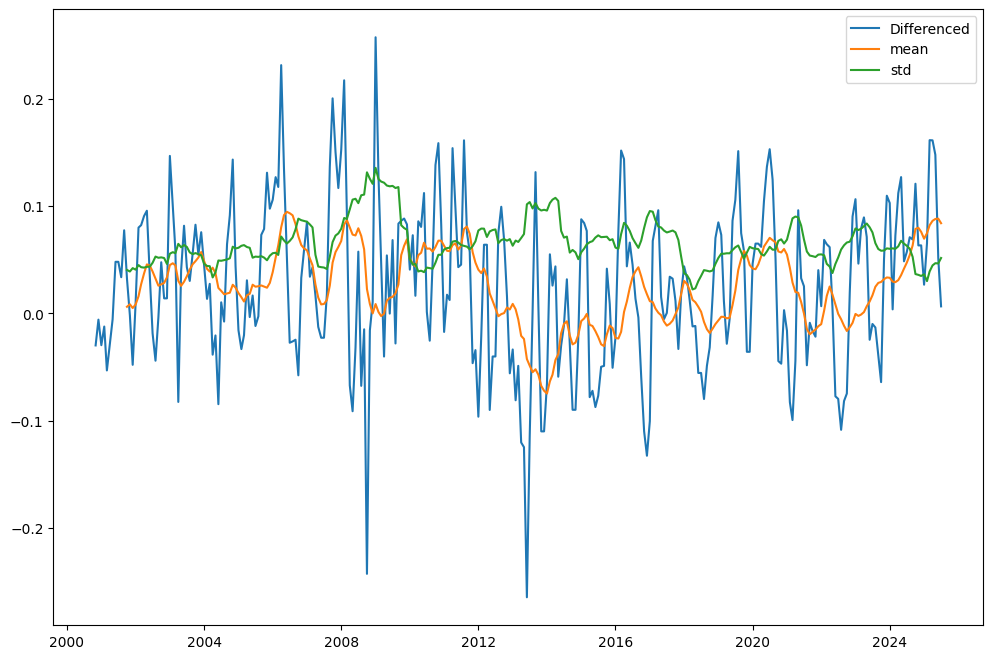

In [24]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log_diff)

print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -2.528462165104204
p-value: 0.10870
Critical value (1%): -3.454
Critical value (5%): -2.872
Critical value (10%): -2.572


## Seasonal Decomposing

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# FIX: Replaced the outdated 'freq' argument with the modern 'period' argument
decompose_result = seasonal_decompose(df_log.dropna(), period=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

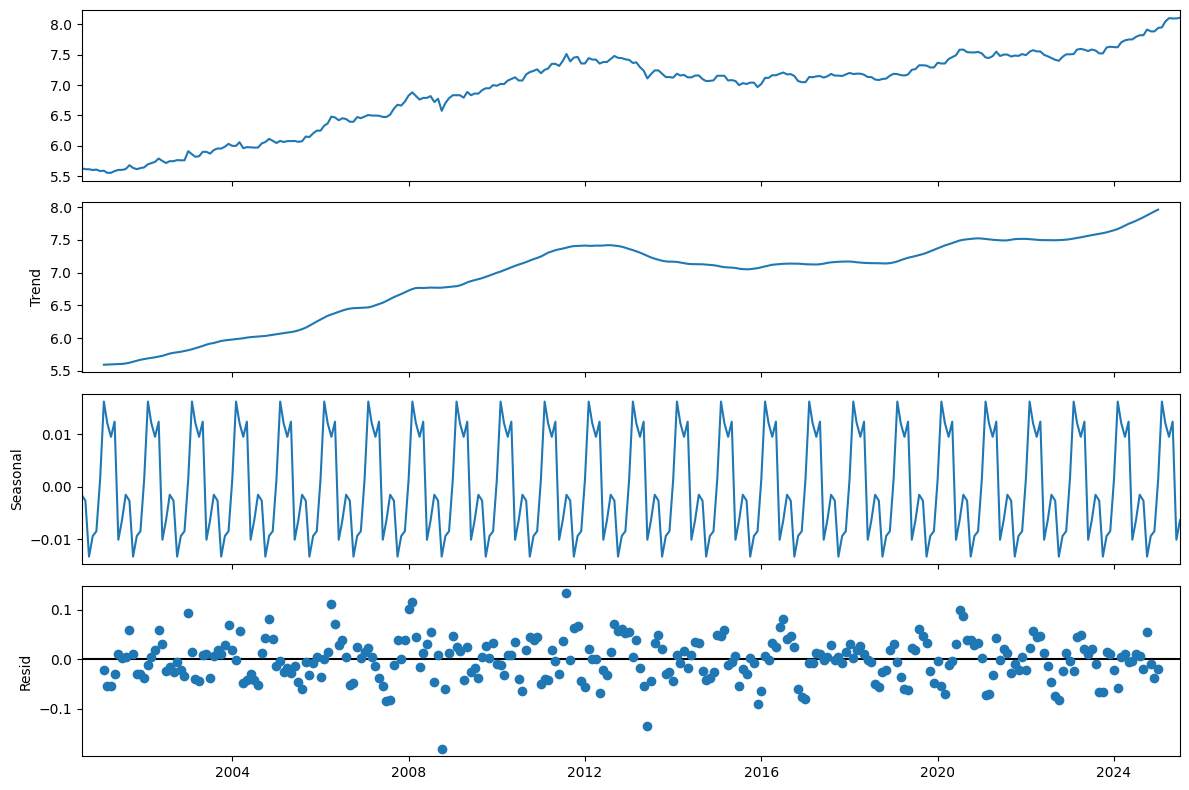

In [27]:
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

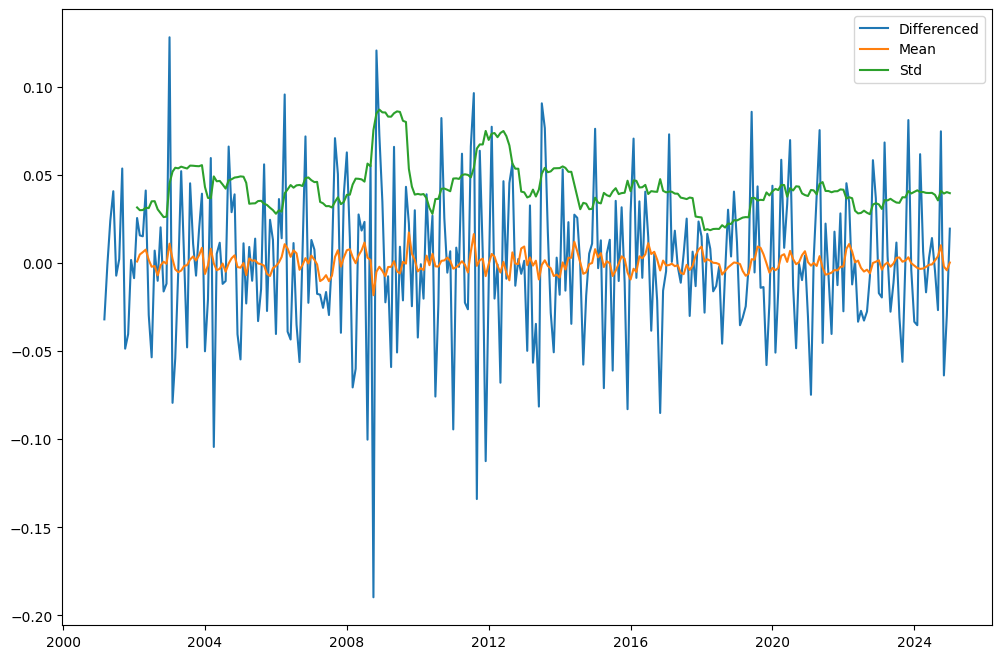

In [28]:
df_log_diff = df_residual.diff().dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [29]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -7.507021328729095
p-value: 0.00000
Critical value (1%): -3.454
Critical value (5%): -2.872
Critical value (10%): -2.572


# Forecasting and Predicting a Time Series

## Finding model parameters by grid search

In [30]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs

In [31]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

In [32]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA(0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 3060.425


## Fitting the SARIMAX model

In [33]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

In [34]:
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               GC=F   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1527.212
Date:                            Tue, 29 Jul 2025   AIC                           3060.425
Time:                                    19:36:55   BIC                           3071.253
Sample:                                08-01-2000   HQIC                          3064.771
                                     - 07-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0101      0.047      0.216      0.829      -0.081       0.101
ma.S.L12      -0.8650      0.038   

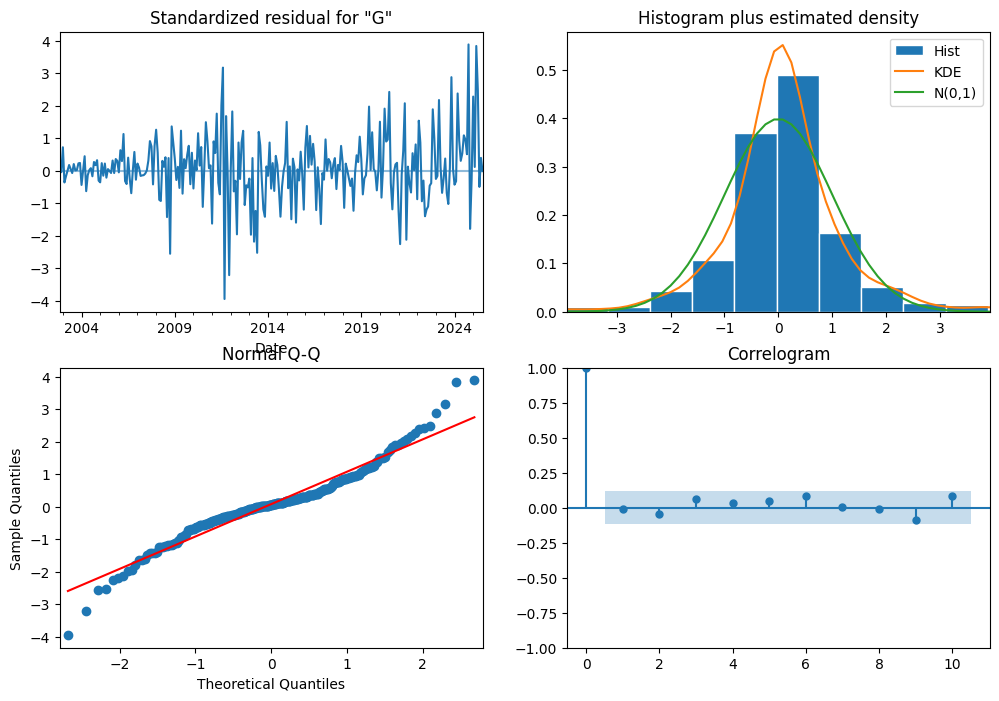

In [35]:
model_results.plot_diagnostics(figsize=(12, 8));

In [36]:
model_results.resid.describe()

,0
count,300.000000
mean,5.039204
std,64.195310
min,-254.401645
25%,-20.115981
50%,3.078443
75%,25.661870
max,278.299988


## Predicting the model

In [37]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start=n-12*5,
    end=n+5
)
prediction_ci = prediction.conf_int()

In [38]:

print(prediction_ci.head(3))

             lower GC=F   upper GC=F
2020-08-01  1866.610544  2117.333365
2020-09-01  1838.218866  2088.941631
2020-10-01  1755.690103  2006.380601


<Figure size 1200x600 with 0 Axes>

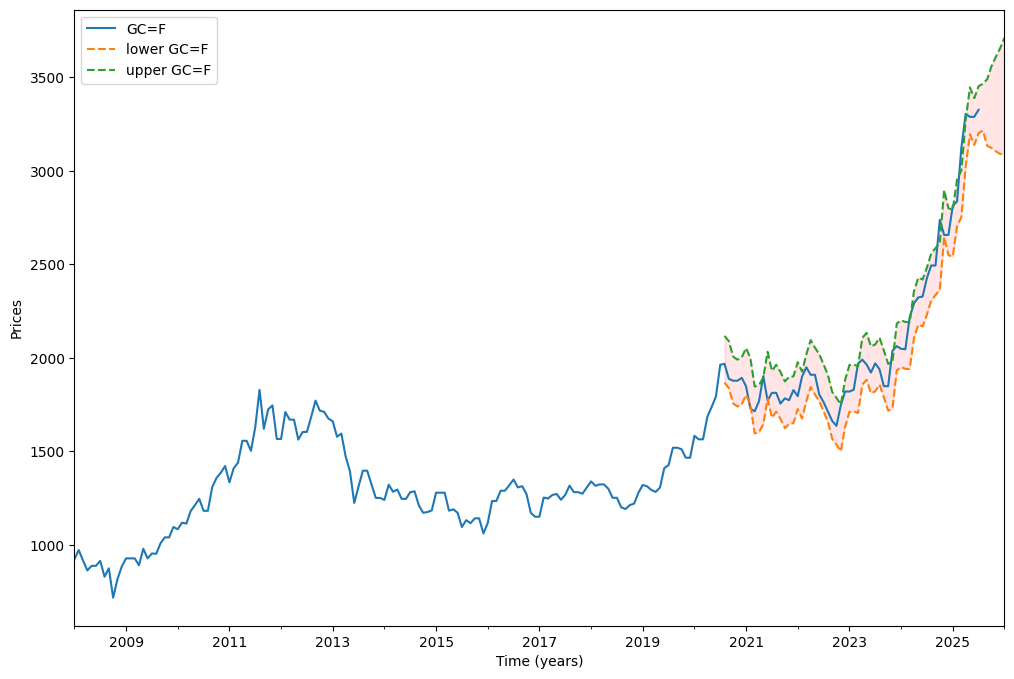

In [39]:
plt.figure(figsize=(12, 6))

ax = df_settle['2008':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()